In [1]:
from network import *
import numpy as np
import random
import matplotlib.pyplot as plt

### Task: Function Approximation

Train a neural network to approximate the $\sin$ function in the range $[-2\pi, 2\pi]$

In [2]:
model = Sequential([
    Layer(1, 10),
    ReLU(),
    Layer(10, 10),
    ReLU(),
    Layer(10, 1)
], criterion=MSELoss())

In [3]:
def generate_training_example():
    model_in = np.random.randint(low=-10, high=10, size=(1, 1))
    model_out = np.sin(model_in)
    return model_in, model_out[0]

In [4]:
data = [generate_training_example() for _ in range(1000)]

losses = []
for _ in range(1000):
    model_in, model_out = generate_training_example() # random.choice(data)
    pred_out = model.forward(model_in)
    loss = model.calculate_loss(model_out, pred_out)
    model.backward()
    model.SGD_step()
    
    losses.append(loss)

In [11]:
max(losses), min(losses)

(1.6448361008449286e+17, 2.0144942712001216e-07)

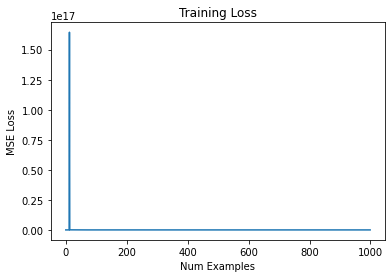

In [12]:
plt.plot(range(len(losses)), losses)
plt.title("Training Loss")
plt.xlabel("Num Examples")
plt.ylabel("MSE Loss")
plt.show()

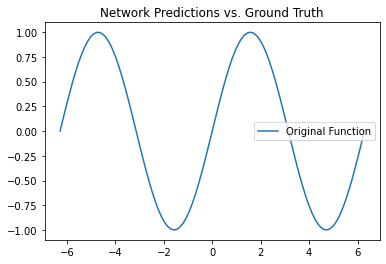

In [15]:
import matplotlib.pyplot as plt

xs = np.linspace(-2 * np.pi, 2 * np.pi, 100)
ys = np.sin(xs)
model_ys = np.array([model.forward(x) for x in np.expand_dims(xs, axis=1)])

plt.plot(xs, ys, label='Original Function')
# plt.plot(xs, model_ys, label='Predicted Function')
plt.legend()
plt.title("Network Predictions vs. Ground Truth")
plt.show()